In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the enhanced dataset
df = pd.read_excel("Enhanced_ExchangeRate_Data.xlsx")

# Optional: Rename for easier plotting
df = df.rename(columns={
    '$ to ₦': 'USD_NGN',
    '€ to ₦': 'EUR_NGN',
    '£ to ₦': 'GBP_NGN'
})


In [2]:
print(df.head())

        Date   USD_NGN   EUR_NGN   GBP_NGN  Day    Month  Year   Weekday  \
0 2015-01-01  183.5912  221.9676  286.0718    1  January  2015  Thursday   
1 2015-01-02  183.5325  220.2764  281.3370    2  January  2015    Friday   
2 2015-01-03  183.5062  220.2448  281.2966    3  January  2015  Saturday   
3 2015-01-04  182.9279  218.5270  279.6053    4  January  2015    Sunday   
4 2015-01-05  183.5190  219.0712  279.9949    5  January  2015    Monday   

   Is_Weekend  USD_Diff  EUR_Diff  GBP_Diff  USD_MA7  EUR_MA7  GBP_MA7  \
0       False       NaN       NaN       NaN      NaN      NaN      NaN   
1       False   -0.0587   -1.6912   -4.7348      NaN      NaN      NaN   
2        True   -0.0263   -0.0316   -0.0404      NaN      NaN      NaN   
3        True   -0.5783   -1.7178   -1.6913      NaN      NaN      NaN   
4       False    0.5911    0.5442    0.3896      NaN      NaN      NaN   

  USD_Rate_Category  
0               Low  
1               Low  
2               Low  
3         

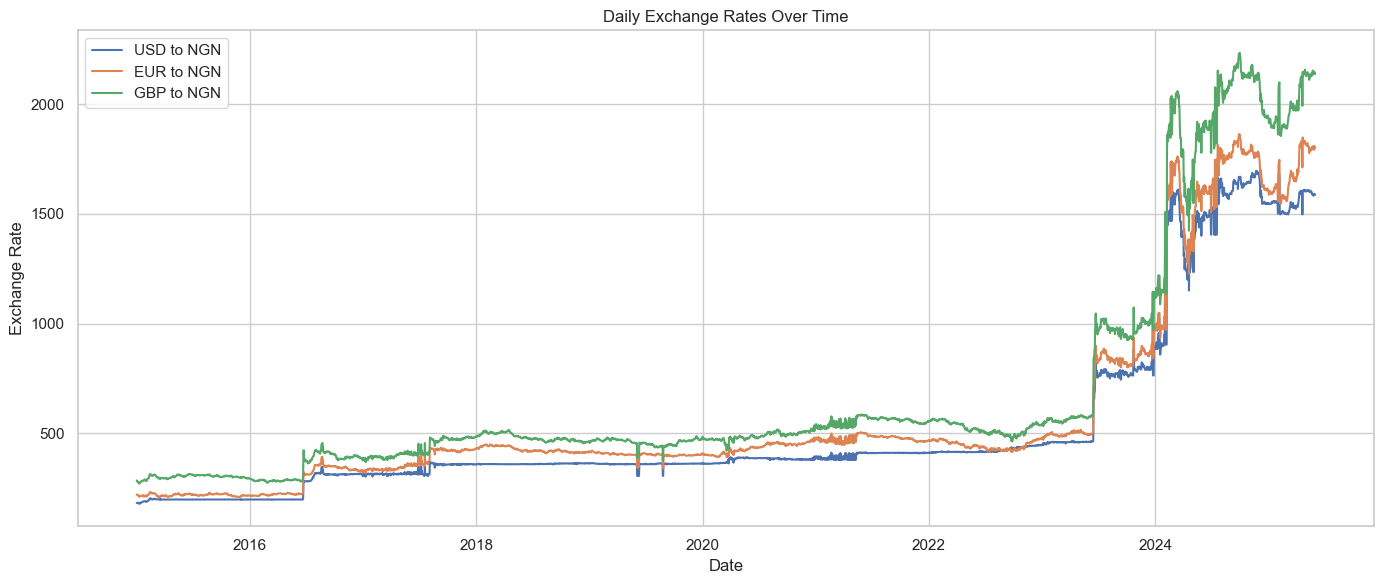

In [3]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['USD_NGN'], label='USD to NGN')
plt.plot(df['Date'], df['EUR_NGN'], label='EUR to NGN')
plt.plot(df['Date'], df['GBP_NGN'], label='GBP to NGN')
plt.title('Daily Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.tight_layout()
plt.show()


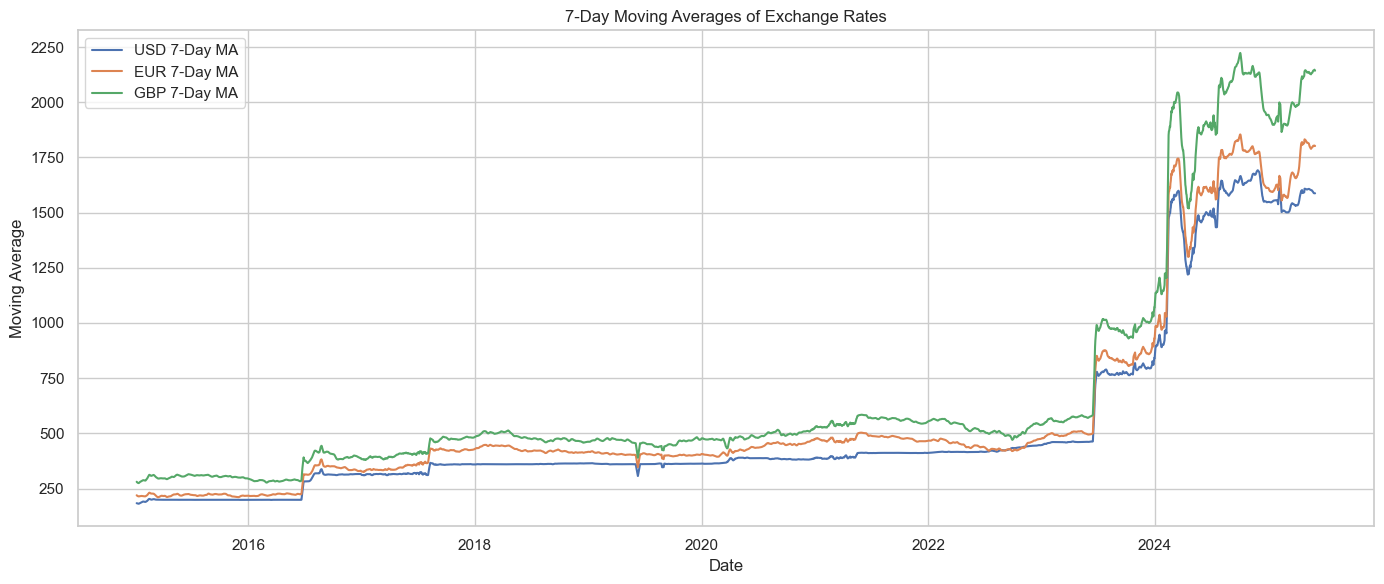

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['USD_MA7'], label='USD 7-Day MA')
plt.plot(df['Date'], df['EUR_MA7'], label='EUR 7-Day MA')
plt.plot(df['Date'], df['GBP_MA7'], label='GBP 7-Day MA')
plt.title('7-Day Moving Averages of Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.tight_layout()
plt.show()


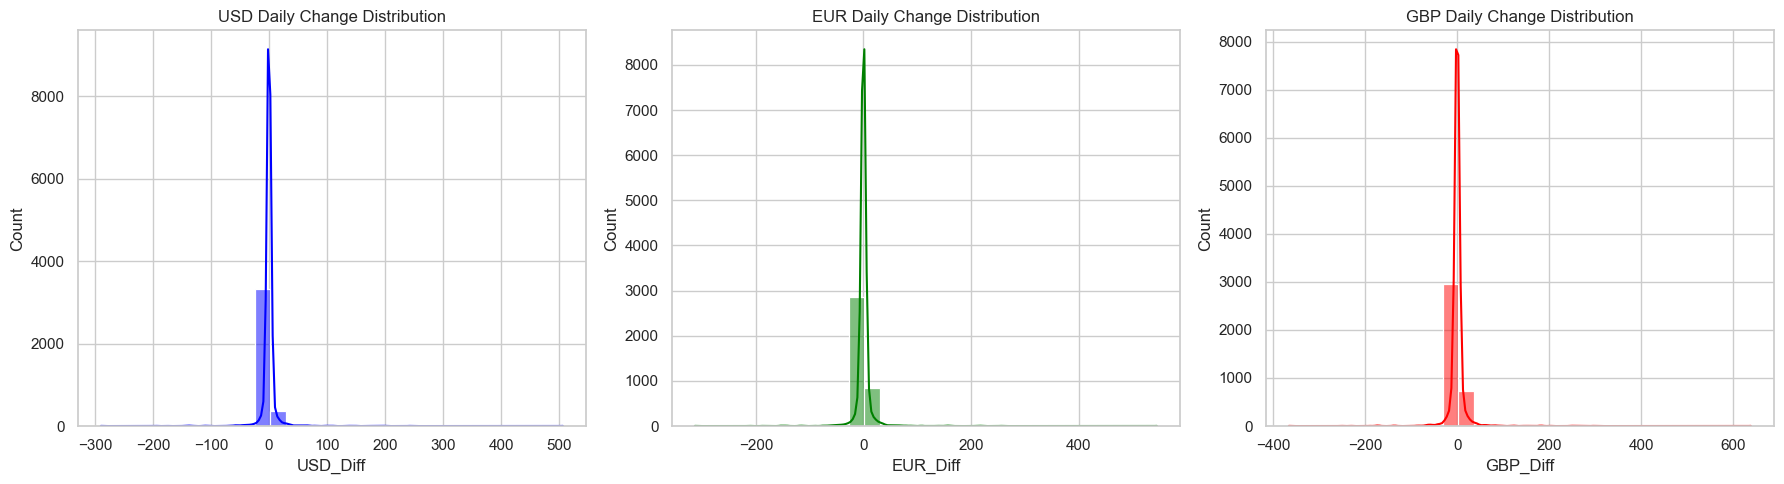

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['USD_Diff'].dropna(), bins=30, kde=True, ax=axs[0], color='blue')
axs[0].set_title('USD Daily Change Distribution')

sns.histplot(df['EUR_Diff'].dropna(), bins=30, kde=True, ax=axs[1], color='green')
axs[1].set_title('EUR Daily Change Distribution')

sns.histplot(df['GBP_Diff'].dropna(), bins=30, kde=True, ax=axs[2], color='red')
axs[2].set_title('GBP Daily Change Distribution')

plt.tight_layout()
plt.show()


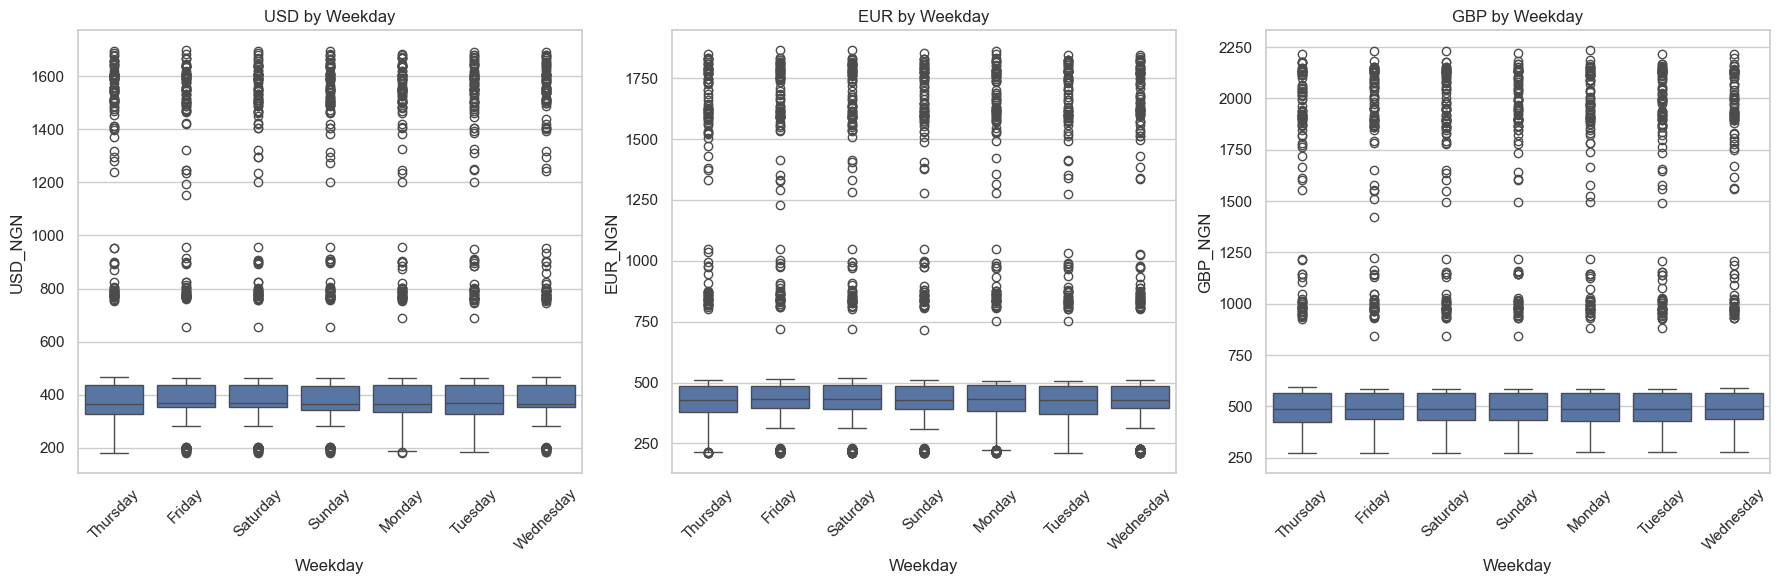

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Weekday', y='USD_NGN', data=df, ax=axs[0])
axs[0].set_title('USD by Weekday')

sns.boxplot(x='Weekday', y='EUR_NGN', data=df, ax=axs[1])
axs[1].set_title('EUR by Weekday')

sns.boxplot(x='Weekday', y='GBP_NGN', data=df, ax=axs[2])
axs[2].set_title('GBP by Weekday')

for ax in axs:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



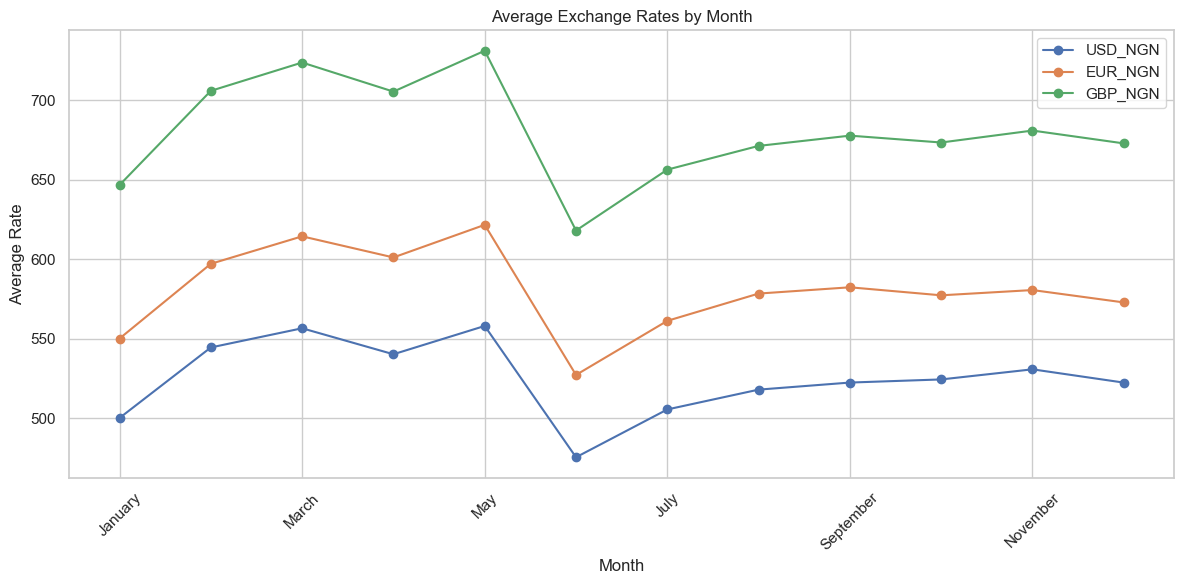

In [10]:
monthly_avg = df.groupby('Month')[['USD_NGN', 'EUR_NGN', 'GBP_NGN']].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_avg.plot(marker='o')
plt.title('Average Exchange Rates by Month')
plt.ylabel('Average Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


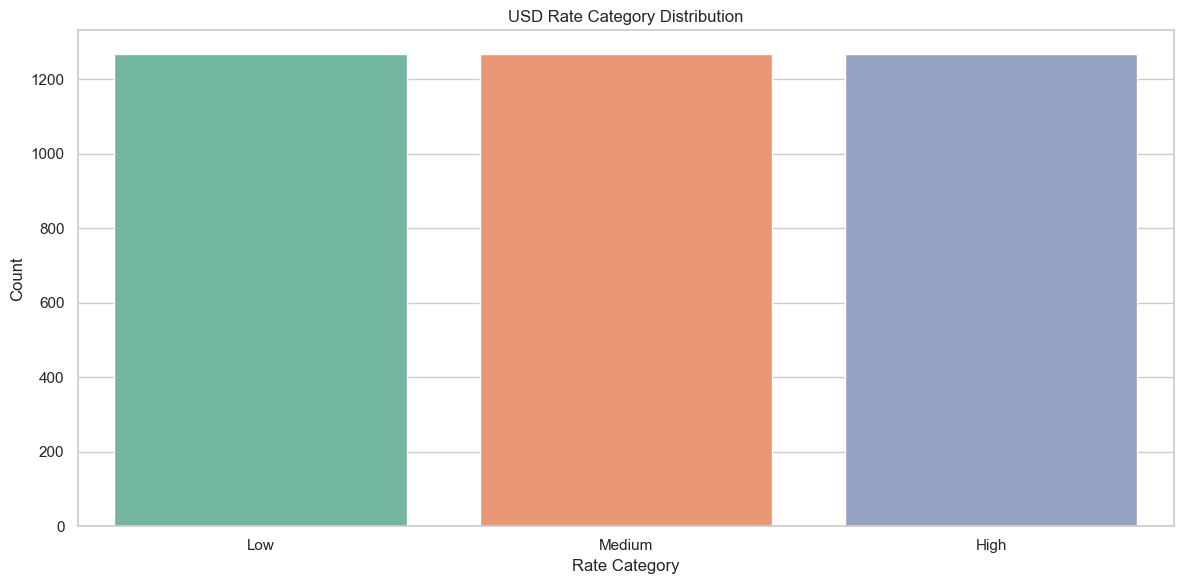

In [12]:
sns.countplot(x='USD_Rate_Category', hue='USD_Rate_Category', data=df, palette='Set2', legend=False)
plt.title('USD Rate Category Distribution')
plt.xlabel('Rate Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [13]:
import scipy.stats as stats

# Prepare the data by weekday
weekday_groups = [group["USD_NGN"].dropna() for name, group in df.groupby("Weekday")]

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*weekday_groups)
print(f"ANOVA Result for USD by Weekday - F-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")


ANOVA Result for USD by Weekday - F-Statistic: 0.0020, P-Value: 1.0000


In [15]:
# Prepare the data by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
month_groups = [group["GBP_NGN"].dropna() for name, group in df.groupby("Month", observed=False)]

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*month_groups)
print(f"ANOVA Result for GBP by Month - F-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")


ANOVA Result for GBP by Month - F-Statistic: 1.2538, P-Value: 0.2452


In [16]:
# Pearson correlation
corr, p_val = stats.pearsonr(df['USD_NGN'], df['GBP_NGN'])
print(f"Pearson Correlation between USD and GBP: {corr:.4f}, P-Value: {p_val:.4f}")


Pearson Correlation between USD and GBP: 0.9983, P-Value: 0.0000


In [1]:
import pandas as pd

df = pd.read_excel("Enhanced_ExchangeRate_Data.xlsx")
print(df.columns)


Index(['Date', '$ to ₦', '€ to ₦', '£ to ₦', 'Day', 'Month', 'Year', 'Weekday',
       'Is_Weekend', 'USD_Diff', 'EUR_Diff', 'GBP_Diff', 'USD_MA7', 'EUR_MA7',
       'GBP_MA7', 'USD_Rate_Category'],
      dtype='object')
